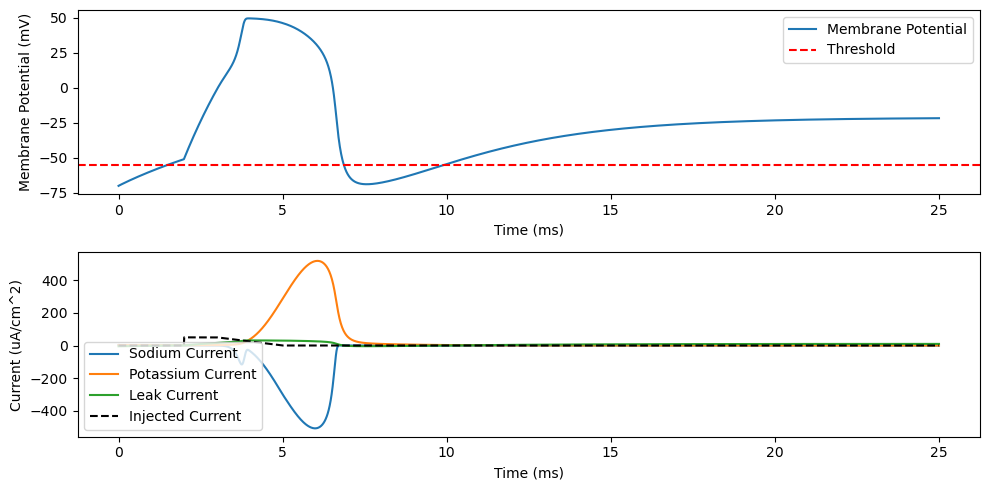

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def modified_hodgkin_huxley_model(simulation_time, dt, injected_current_duration, sodium_current_magnitude):
    # Simulation parameters
    num_steps = int(simulation_time / dt)
    time = np.linspace(0, simulation_time, num_steps)

    # Neuron parameters
    Cm = 1.0  # membrane capacitance (uF/cm^2)
    g_Na = 400.0  # increased sodium conductance (mS/cm^2)
    g_K = 36.0  # potassium conductance (mS/cm^2)
    g_L = 0.3  # leak conductance (mS/cm^2)
    E_Na = 50.0  # sodium reversal potential (mV)
    E_K = -77.0  # potassium reversal potential (mV)
    E_L = -54.387  # leak reversal potential (mV)

    # Initial conditions
    Vm = -70.0  # initial membrane potential (mV)
    m = 0.05  # initial sodium activation gate
    h = 0.6  # initial sodium inactivation gate
    n = 0.32  # initial potassium activation gate

    # Arrays to store results
    membrane_potential = np.zeros(num_steps)
    sodium_current = np.zeros(num_steps)
    potassium_current = np.zeros(num_steps)
    leak_current = np.zeros(num_steps)

    # Injection parameters
    injected_current = np.zeros(num_steps)
    injected_current[int(2 / dt):int((2 + injected_current_duration) / dt)] = sodium_current_magnitude  # initial pulse

    # Linear decay of injected current after the pulse
    decay_duration = 2.0  # duration of the linear decay
    decay_steps = int(decay_duration / dt)
    injected_current[int((2 + injected_current_duration) / dt):int((2 + injected_current_duration + decay_duration) / dt)] = np.linspace(sodium_current_magnitude, 0, decay_steps)

    # Simulation loop
    for i in range(num_steps):
        # Hodgkin-Huxley model equations
        alpha_m = 0.1 * (25 - Vm) / (np.exp((25 - Vm) / 10) - 1)
        beta_m = 4.0 * np.exp(-Vm / 18)
        alpha_h = 0.07 * np.exp(-Vm / 20)
        beta_h = 1.0 / (np.exp((30 - Vm) / 10) + 1)
        alpha_n = 0.01 * (10 - Vm) / (np.exp((10 - Vm) / 10) - 1)
        beta_n = 0.125 * np.exp(-Vm / 80)

        m += dt * (alpha_m * (1 - m) - beta_m * m)
        h += dt * (alpha_h * (1 - h) - beta_h * h)
        n += dt * (alpha_n * (1 - n) - beta_n * n)

        I_Na = g_Na * m**3 * h * (Vm - E_Na)
        I_K = g_K * n**4 * (Vm - E_K)
        I_L = g_L * (Vm - E_L)

        dVm = (-(I_Na + I_K + I_L - injected_current[i]) + 10) / Cm  # Inject a small current for simulation

        Vm += dt * dVm

        # Store results
        membrane_potential[i] = Vm
        sodium_current[i] = I_Na
        potassium_current[i] = I_K
        leak_current[i] = I_L

    return time, membrane_potential, sodium_current, potassium_current, leak_current, injected_current

# Simulation parameters
simulation_time = 25.0  # ms
dt = 0.01  # ms
injected_current_duration = 1.0  # ms
sodium_current_magnitude = 50.0  # Increased sodium current magnitude

# Run the simulation
time, membrane_potential, sodium_current, potassium_current, leak_current, injected_current = modified_hodgkin_huxley_model(
    simulation_time, dt, injected_current_duration, sodium_current_magnitude
)

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time, membrane_potential, label='Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.axhline(y=-55, color='r', linestyle='--', label='Threshold')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, sodium_current, label='Sodium Current')
plt.plot(time, potassium_current, label='Potassium Current')
plt.plot(time, leak_current, label='Leak Current')
plt.plot(time, injected_current, label='Injected Current', linestyle='--', color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Current (uA/cm^2)')
plt.legend()

plt.tight_layout()
plt.show()